In [1]:
import pickle
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

In [2]:
def get_file_size(base_path,assembly_id, body_id):
    # Construct the path to the .step file using the updated structure
    file_path = os.path.join(base_path, assembly_id, body_id + '.step')
    # Check if the file exists and get its size
    if os.path.exists(file_path):
        return os.path.getsize(file_path)
    else:
        return None

In [3]:
def extract_geometric_data_from_step(base_path, df, pickle_path=None):
    # Determine if we're processing train or test data based on the base_path
    dataset_type = 'train' if 'train' in base_path else 'test'
    
    # Set the default pickle path if none is provided
    if pickle_path is None:
        pickle_path = f"geometric_features_{dataset_type}.pkl"
    
    # Check if pickle file exists
    if os.path.exists(pickle_path):
        with open(pickle_path, 'rb') as f:
            return pickle.load(f)

    # Geometric entities we are interested in
    geometric_entities = ['CYLINDRICAL_SURFACE', 'SPHERICAL_SURFACE', 'PLANE']

    # Initialize a dictionary to store the counts
    data = {
        'assembly_id': [],
        'body_id': []
    }
    for entity in geometric_entities:
        data[entity] = []

    # Loop through each row in df to get assembly_id and body_id
    for index, row in tqdm(df.iterrows(), total=df.shape[0], desc=f"Processing {dataset_type} STEP files"):
        assembly_id = row['assembly_id']
        body_id = row['body_id']

        # Construct the path to the .step file
        file_path = os.path.join(base_path, assembly_id, body_id + '.step')

        # Initialize counts for geometric entities
        entity_counts = {entity: 0 for entity in geometric_entities}

        # Check if the file exists
        if os.path.exists(file_path):
            with open(file_path, 'r') as file:
                content = file.read()
                for entity in geometric_entities:
                    entity_counts[entity] = content.count(entity)

        # Append the results to the data dictionary
        data['assembly_id'].append(assembly_id)
        data['body_id'].append(body_id)
        for entity, count in entity_counts.items():
            data[entity].append(count)

    # Convert the data dictionary to a DataFrame
    df_geometric_data = pd.DataFrame(data)

    # Save the DataFrame to a pickle file
    with open(pickle_path, 'wb') as f:
        pickle.dump(df_geometric_data, f)

    return df_geometric_data


In [4]:
# Load the df_main dataframe from the provided pickle file
df_main = pd.read_pickle("df_main.pkl")
df_test_main = pd.read_pickle("df_test_main.pkl")

In [5]:
df_main.head()

,body_id,assembly_id,name,volume,area,material_category,properties_vertex_count,properties_edge_count,properties_face_count,properties_loop_count,...,properties_category_Tools,properties_category_Automotive,properties_category_Design,properties_category_Toys,properties_industry_Other Industries,"properties_industry_Architecture, Engineering & Construction",properties_industry_Product Design & Manufacturing,properties_industry_Civil Infrastructure,properties_industry_Media & Entertainment,components_name
0,f130d4f0-054c-11ec-a094-0a2b8709b52f,100029_94515530,NaN,0.064315,1.892846,Plastic,350,507,211,253,...,0,0,0,0,0,0,1,0,0,root
1,f1314a74-054c-11ec-ac03-0a2b8709b52f,100029_94515530,NaN,0.007196,0.659531,Metal_Ferrous_Steel,350,507,211,253,...,0,0,0,0,0,0,1,0,0,root
2,f131bfb6-054c-11ec-9eb4-0a2b8709b52f,100029_94515530,NaN,0.007167,0.657318,Metal_Non-Ferrous,350,507,211,253,...,0,0,0,0,0,0,1,0,0,root
3,f13234e8-054c-11ec-8b13-0a2b8709b52f,100029_94515530,NaN,0.064315,1.892846,Other,350,507,211,253,...,0,0,0,0,0,0,1,0,0,root
4,f13282ee-054c-11ec-aa03-0a2b8709b52f,100029_94515530,NaN,0.064315,1.892846,Plastic,350,507,211,253,...,0,0,0,0,0,0,1,0,0,root


In [6]:
df_main.shape

(131248, 33)

In [7]:
df_main.columns.tolist()

['body_id',
 'assembly_id',
 'name',
 'volume',
 'area',
 'material_category',
 'properties_vertex_count',
 'properties_edge_count',
 'properties_face_count',
 'properties_loop_count',
 'properties_shell_count',
 'properties_body_count',
 'properties_area',
 'properties_volume',
 'properties_likes_count',
 'properties_comments_count',
 'properties_views_count',
 'properties_category_Mechanical Engineering',
 'properties_category_Product Design',
 'properties_category_Miscellaneous',
 'properties_category_Electronics',
 'properties_category_Machine design',
 'properties_category_Furniture + Household',
 'properties_category_Tools',
 'properties_category_Automotive',
 'properties_category_Design',
 'properties_category_Toys',
 'properties_industry_Other Industries',
 'properties_industry_Architecture, Engineering & Construction',
 'properties_industry_Product Design & Manufacturing',
 'properties_industry_Civil Infrastructure',
 'properties_industry_Media & Entertainment',
 'components_n

In [8]:
df_test_main.head()

,body_id,assembly_id,name,volume,area,material_category,properties_vertex_count,properties_edge_count,properties_face_count,properties_loop_count,...,properties_category_Tools,properties_category_Automotive,properties_category_Design,properties_category_Toys,properties_industry_Other Industries,"properties_industry_Architecture, Engineering & Construction",properties_industry_Product Design & Manufacturing,properties_industry_Civil Infrastructure,properties_industry_Media & Entertainment,components_name
0,bbdf29da-060c-11ec-a52a-02ef91e90f5f,131068_085c0ed9,Bolt M6-1,1.089020,7.679887,None,804,1311,546,580,...,1,0,0,0,0,0,1,0,0,Component5
1,bbdf9f22-060c-11ec-ac81-02ef91e90f5f,131068_085c0ed9,Ramp,475.446755,972.513358,None,804,1311,546,580,...,1,0,0,0,0,0,1,0,0,root
2,bbe89f86-060c-11ec-8111-02ef91e90f5f,131068_085c0ed9,Blade mount,241.470603,460.819725,None,804,1311,546,580,...,1,0,0,0,0,0,1,0,0,root
3,bbee1dec-060c-11ec-aabe-02ef91e90f5f,131068_085c0ed9,Fixed blade,21.600000,73.200000,None,804,1311,546,580,...,1,0,0,0,0,0,1,0,0,root
4,bbee44f6-060c-11ec-bd48-02ef91e90f5f,131068_085c0ed9,Bracket,11.563476,54.622106,None,804,1311,546,580,...,1,0,0,0,0,0,1,0,0,root


In [9]:
df_test_main.columns.tolist()

['body_id',
 'assembly_id',
 'name',
 'volume',
 'area',
 'material_category',
 'properties_vertex_count',
 'properties_edge_count',
 'properties_face_count',
 'properties_loop_count',
 'properties_shell_count',
 'properties_body_count',
 'properties_area',
 'properties_volume',
 'properties_likes_count',
 'properties_comments_count',
 'properties_views_count',
 'properties_category_Mechanical Engineering',
 'properties_category_Product Design',
 'properties_category_Miscellaneous',
 'properties_category_Electronics',
 'properties_category_Machine design',
 'properties_category_Furniture + Household',
 'properties_category_Tools',
 'properties_category_Automotive',
 'properties_category_Design',
 'properties_category_Toys',
 'properties_industry_Other Industries',
 'properties_industry_Architecture, Engineering & Construction',
 'properties_industry_Product Design & Manufacturing',
 'properties_industry_Civil Infrastructure',
 'properties_industry_Media & Entertainment',
 'components_n

In [10]:
df_test_main.shape

(155, 33)

In [11]:
# Define the base directory where the .step files are stored
base_path_train = "C:\\Users\\richt\\Documents\\ASME_data\\train\\Fusion360GalleryDataset_23hackathon_train"
base_path_test = "C:\\Users\\richt\\Documents\\ASME_data\\test\\Fusion360GalleryDataset_23hackathon_test"

In [12]:
# Apply the function to the 'body_id' column to get the file sizes
df_main['body_file_size'] = df_main.apply(lambda row: get_file_size(base_path_train,row['assembly_id'], row['body_id']), axis=1)

df_main[['body_id', 'body_file_size']].head(5)

,body_id,body_file_size
0,f130d4f0-054c-11ec-a094-0a2b8709b52f,15357
1,f1314a74-054c-11ec-ac03-0a2b8709b52f,91740
2,f131bfb6-054c-11ec-9eb4-0a2b8709b52f,90150
3,f13234e8-054c-11ec-8b13-0a2b8709b52f,14920
4,f13282ee-054c-11ec-aa03-0a2b8709b52f,15269


In [13]:
df_main.shape

(131248, 34)

In [14]:
df_main.head()

,body_id,assembly_id,name,volume,area,material_category,properties_vertex_count,properties_edge_count,properties_face_count,properties_loop_count,...,properties_category_Automotive,properties_category_Design,properties_category_Toys,properties_industry_Other Industries,"properties_industry_Architecture, Engineering & Construction",properties_industry_Product Design & Manufacturing,properties_industry_Civil Infrastructure,properties_industry_Media & Entertainment,components_name,body_file_size
0,f130d4f0-054c-11ec-a094-0a2b8709b52f,100029_94515530,NaN,0.064315,1.892846,Plastic,350,507,211,253,...,0,0,0,0,0,1,0,0,root,15357
1,f1314a74-054c-11ec-ac03-0a2b8709b52f,100029_94515530,NaN,0.007196,0.659531,Metal_Ferrous_Steel,350,507,211,253,...,0,0,0,0,0,1,0,0,root,91740
2,f131bfb6-054c-11ec-9eb4-0a2b8709b52f,100029_94515530,NaN,0.007167,0.657318,Metal_Non-Ferrous,350,507,211,253,...,0,0,0,0,0,1,0,0,root,90150
3,f13234e8-054c-11ec-8b13-0a2b8709b52f,100029_94515530,NaN,0.064315,1.892846,Other,350,507,211,253,...,0,0,0,0,0,1,0,0,root,14920
4,f13282ee-054c-11ec-aa03-0a2b8709b52f,100029_94515530,NaN,0.064315,1.892846,Plastic,350,507,211,253,...,0,0,0,0,0,1,0,0,root,15269


In [15]:
# Apply the function to the 'body_id' column to get the file sizes
df_test_main['body_file_size'] = df_test_main.apply(lambda row: get_file_size(base_path_test,row['assembly_id'], row['body_id']), axis=1)

df_test_main[['body_id', 'body_file_size']].head(5)

,body_id,body_file_size
0,bbdf29da-060c-11ec-a52a-02ef91e90f5f,39531
1,bbdf9f22-060c-11ec-ac81-02ef91e90f5f,777582
2,bbe89f86-060c-11ec-8111-02ef91e90f5f,1075824
3,bbee1dec-060c-11ec-aabe-02ef91e90f5f,11328
4,bbee44f6-060c-11ec-bd48-02ef91e90f5f,37176


In [16]:
# Extract geometric data from the STEP files
df_geometric_features_train = extract_geometric_data_from_step(base_path_train, df_main)
df_geometric_features_train = df_geometric_features_train.drop('assembly_id', axis=1)
df_geometric_features_train.head(25)
df_geometric_features_train.shape

Processing train STEP files:   0%|          | 0/131248 [00:00<?, ?it/s]

Processing train STEP files: 100%|██████████| 131248/131248 [39:00<00:00, 56.08it/s] 


(131248, 4)

In [17]:
# Extract geometric data from the STEP files
df_geometric_features_test = extract_geometric_data_from_step(base_path_test, df_test_main)
df_geometric_features_test = df_geometric_features_test.drop('assembly_id', axis=1)
df_geometric_features_test.head(25)
df_geometric_features_test.shape

Processing test STEP files: 100%|██████████| 155/155 [00:03<00:00, 44.45it/s]


(155, 4)

In [18]:
# Merge the two dataframes
df_main = pd.merge(df_main, df_geometric_features_train, on='body_id', how='inner')

In [19]:
# Merge the two dataframes
df_test_main = pd.merge(df_test_main, df_geometric_features_test, on='body_id', how='inner')

In [20]:
print("Number of duplicate 'body_id' in df_main:", df_main["body_id"].duplicated().sum())
print("Number of duplicate 'body_id' in df_geometric_features_train:", df_geometric_features_train["body_id"].duplicated().sum())

Number of duplicate 'body_id' in df_main: 0
Number of duplicate 'body_id' in df_geometric_features_train: 0


In [21]:
print("Number of duplicate 'body_id' in df_test_main:", df_test_main["body_id"].duplicated().sum())
print("Number of duplicate 'body_id' in df_geometric_features_test:", df_geometric_features_test["body_id"].duplicated().sum())

Number of duplicate 'body_id' in df_test_main: 0
Number of duplicate 'body_id' in df_geometric_features_test: 0


In [22]:
common_body_ids = set(df_main["body_id"]).intersection(set(df_geometric_features_train["body_id"]))
print("Number of common 'body_id' values:", len(common_body_ids))

Number of common 'body_id' values: 131248


In [23]:
common_body_ids = set(df_main["body_id"]).intersection(set(df_geometric_features_test["body_id"]))
print("Number of common 'body_id' values:", len(common_body_ids))

Number of common 'body_id' values: 0


In [24]:
df_main.tail(5)

,body_id,assembly_id,name,volume,area,material_category,properties_vertex_count,properties_edge_count,properties_face_count,properties_loop_count,...,properties_industry_Other Industries,"properties_industry_Architecture, Engineering & Construction",properties_industry_Product Design & Manufacturing,properties_industry_Civil Infrastructure,properties_industry_Media & Entertainment,components_name,body_file_size,CYLINDRICAL_SURFACE,SPHERICAL_SURFACE,PLANE
131243,f95a09b6-0613-11ec-b131-0226f5980261,99852_1dadcef4,NaN,0.116680,1.729151,Metal_Ferrous_Steel,3511,5189,1902,2420,...,0,0,1,0,0,manubrio,17938,4,0,6
131244,f95a5828-0613-11ec-ab9b-0226f5980261,99852_1dadcef4,NaN,0.002853,0.129364,Metal_Ferrous_Steel,3511,5189,1902,2420,...,0,0,1,0,0,tornillo doble,6562,1,1,3
131245,f95a7efe-0613-11ec-bc18-0226f5980261,99852_1dadcef4,NaN,0.000024,0.016467,Metal_Ferrous_Steel,3511,5189,1902,2420,...,0,0,1,0,0,tornillo doble,7424,2,0,3
131246,f95acd26-0613-11ec-a896-0226f5980261,99852_1dadcef4,NaN,0.002356,0.109956,Metal_Ferrous_Steel,3511,5189,1902,2420,...,0,0,1,0,0,tornillo sencillo,5677,1,0,3
131247,f95af41c-0613-11ec-8208-0226f5980261,99852_1dadcef4,NaN,0.001571,0.094248,Metal_Ferrous_Steel,3511,5189,1902,2420,...,0,0,1,0,0,tornillo sencillo,5678,1,0,3


In [25]:
df_test_main.tail()

,body_id,assembly_id,name,volume,area,material_category,properties_vertex_count,properties_edge_count,properties_face_count,properties_loop_count,...,properties_industry_Other Industries,"properties_industry_Architecture, Engineering & Construction",properties_industry_Product Design & Manufacturing,properties_industry_Civil Infrastructure,properties_industry_Media & Entertainment,components_name,body_file_size,CYLINDRICAL_SURFACE,SPHERICAL_SURFACE,PLANE
150,3b4ce74c-05cc-11ec-a9ce-064a63348d37,74576_73ac0093,Pata_1,2064.512000,1677.212800,None,120,184,90,90,...,0,0,1,0,0,Patas,9071,0,0,7
151,3b4d0e4c-05cc-11ec-9c6d-064a63348d37,74576_73ac0093,Pata_4,2064.512000,1677.212800,None,120,184,90,90,...,0,0,1,0,0,Patas,9149,0,0,7
152,3b4d355a-05cc-11ec-9f42-064a63348d37,74576_73ac0093,Pata_3,2064.512000,1677.212800,None,120,184,90,90,...,0,0,1,0,0,Patas,9123,0,0,7
153,3b4d8388-05cc-11ec-acde-064a63348d37,74576_73ac0093,Pata_2,2064.512000,1677.212800,None,120,184,90,90,...,0,0,1,0,0,Patas,9097,0,0,7
154,3b4daaa2-05cc-11ec-bc9f-064a63348d37,74576_73ac0093,Body1,33436.374783,27786.304206,None,120,184,90,90,...,0,0,1,0,0,Tabla,23759,8,0,7


In [26]:
df_main.shape

(131248, 37)

In [27]:
df_test_main.shape

(155, 37)

In [28]:
# Summarize the correlated columns by multiplication
df_main['assembly_complexity'] = df_main['properties_vertex_count'] * df_main['properties_edge_count'] * df_main['properties_face_count']
df_test_main['assembly_complexity'] = df_test_main['properties_vertex_count'] * df_test_main['properties_edge_count'] * df_test_main['properties_face_count']

In [29]:
# Identify columns that start with 'properties_industries_' or 'properties_categories_'
industries_columns = [col for col in df_main.columns if col.startswith('properties_industry_')]
categories_columns = [col for col in df_main.columns if col.startswith('properties_category_')]

columns_to_keep = [
    'assembly_id', 'body_id', 'volume', 'area', 'properties_volume', 'properties_area',
    'properties_shell_count', 'properties_body_count', 'assembly_complexity', 'body_file_size',
    'CYLINDRICAL_SURFACE', 'SPHERICAL_SURFACE', 'PLANE'
] + industries_columns + categories_columns

df_main_fe = df_main[columns_to_keep].copy()
df_main_fe_test = df_test_main[columns_to_keep].copy()

In [30]:
df_main_fe.head()

,assembly_id,body_id,volume,area,properties_volume,properties_area,properties_shell_count,properties_body_count,assembly_complexity,body_file_size,...,properties_category_Mechanical Engineering,properties_category_Product Design,properties_category_Miscellaneous,properties_category_Electronics,properties_category_Machine design,properties_category_Furniture + Household,properties_category_Tools,properties_category_Automotive,properties_category_Design,properties_category_Toys
0,100029_94515530,f130d4f0-054c-11ec-a094-0a2b8709b52f,0.064315,1.892846,0.214475,7.652705,6,6,37441950,15357,...,1,0,0,0,0,0,0,0,0,0
1,100029_94515530,f1314a74-054c-11ec-ac03-0a2b8709b52f,0.007196,0.659531,0.214475,7.652705,6,6,37441950,91740,...,1,0,0,0,0,0,0,0,0,0
2,100029_94515530,f131bfb6-054c-11ec-9eb4-0a2b8709b52f,0.007167,0.657318,0.214475,7.652705,6,6,37441950,90150,...,1,0,0,0,0,0,0,0,0,0
3,100029_94515530,f13234e8-054c-11ec-8b13-0a2b8709b52f,0.064315,1.892846,0.214475,7.652705,6,6,37441950,14920,...,1,0,0,0,0,0,0,0,0,0
4,100029_94515530,f13282ee-054c-11ec-aa03-0a2b8709b52f,0.064315,1.892846,0.214475,7.652705,6,6,37441950,15269,...,1,0,0,0,0,0,0,0,0,0


In [31]:
df_main_fe_test.head()

,assembly_id,body_id,volume,area,properties_volume,properties_area,properties_shell_count,properties_body_count,assembly_complexity,body_file_size,...,properties_category_Mechanical Engineering,properties_category_Product Design,properties_category_Miscellaneous,properties_category_Electronics,properties_category_Machine design,properties_category_Furniture + Household,properties_category_Tools,properties_category_Automotive,properties_category_Design,properties_category_Toys
0,131068_085c0ed9,bbdf29da-060c-11ec-a52a-02ef91e90f5f,1.089020,7.679887,1225.585809,2191.649089,7,7,575508024,39531,...,1,0,0,0,1,0,1,0,0,0
1,131068_085c0ed9,bbdf9f22-060c-11ec-ac81-02ef91e90f5f,475.446755,972.513358,1225.585809,2191.649089,7,7,575508024,777582,...,1,0,0,0,1,0,1,0,0,0
2,131068_085c0ed9,bbe89f86-060c-11ec-8111-02ef91e90f5f,241.470603,460.819725,1225.585809,2191.649089,7,7,575508024,1075824,...,1,0,0,0,1,0,1,0,0,0
3,131068_085c0ed9,bbee1dec-060c-11ec-aabe-02ef91e90f5f,21.600000,73.200000,1225.585809,2191.649089,7,7,575508024,11328,...,1,0,0,0,1,0,1,0,0,0
4,131068_085c0ed9,bbee44f6-060c-11ec-bd48-02ef91e90f5f,11.563476,54.622106,1225.585809,2191.649089,7,7,575508024,37176,...,1,0,0,0,1,0,1,0,0,0


In [32]:
# Rename columns
df_main_fe.rename(columns={
    'properties_volume': 'assembly_volume',
    'properties_area': 'assembly_area',
    'properties_shell_count': 'assembly_shell_count',
    'properties_body_count': 'assembly_body_count'
}, inplace=True)

# Rename columns
df_main_fe_test.rename(columns={
    'properties_volume': 'assembly_volume',
    'properties_area': 'assembly_area',
    'properties_shell_count': 'assembly_shell_count',
    'properties_body_count': 'assembly_body_count'
}, inplace=True)

In [33]:
# Basic statistics for numerical columns
df_main_fe.describe()

,volume,area,assembly_volume,assembly_area,assembly_shell_count,assembly_body_count,assembly_complexity,body_file_size,CYLINDRICAL_SURFACE,SPHERICAL_SURFACE,...,properties_category_Mechanical Engineering,properties_category_Product Design,properties_category_Miscellaneous,properties_category_Electronics,properties_category_Machine design,properties_category_Furniture + Household,properties_category_Tools,properties_category_Automotive,properties_category_Design,properties_category_Toys
count,1.312480e+05,1.312480e+05,1.312480e+05,1.312480e+05,131248.000000,131248.000000,1.312480e+05,1.312480e+05,131248.000000,131248.000000,...,131248.000000,131248.000000,131248.000000,131248.000000,131248.000000,131248.000000,131248.000000,131248.000000,131248.000000,131248.000000
mean,4.784566e+13,4.099881e+08,1.483214e+15,1.271612e+10,78.057586,77.179370,1.231511e+12,1.253919e+05,7.398017,0.359449,...,0.547483,0.175020,0.097716,0.100177,0.088870,0.045380,0.048130,0.065677,0.050744,0.052999
std,1.692769e+16,1.216469e+11,9.649824e+16,8.262566e+11,89.049448,88.229087,2.881133e+13,7.302536e+05,33.905628,3.850005,...,0.497742,0.379985,0.296931,0.300237,0.284557,0.208136,0.214042,0.247718,0.219475,0.224032
min,0.000000e+00,0.000000e+00,0.000000e+00,2.223290e-04,1.000000,1.000000,0.000000e+00,3.561000e+03,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.963495e-02,1.198710e+00,8.126405e+01,5.278290e+02,20.000000,20.000000,6.276192e+07,9.730000e+03,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,9.726926e-01,1.469507e+01,7.179381e+02,2.445781e+03,47.000000,47.000000,1.142958e+09,1.701700e+04,1.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3.357134e+01,1.655849e+02,1.113736e+04,1.975367e+04,105.000000,104.000000,1.835595e+10,5.335200e+04,4.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,6.131791e+18,4.341543e+13,6.279637e+18,5.376878e+13,821.000000,821.000000,1.130220e+15,6.816475e+07,2214.000000,402.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


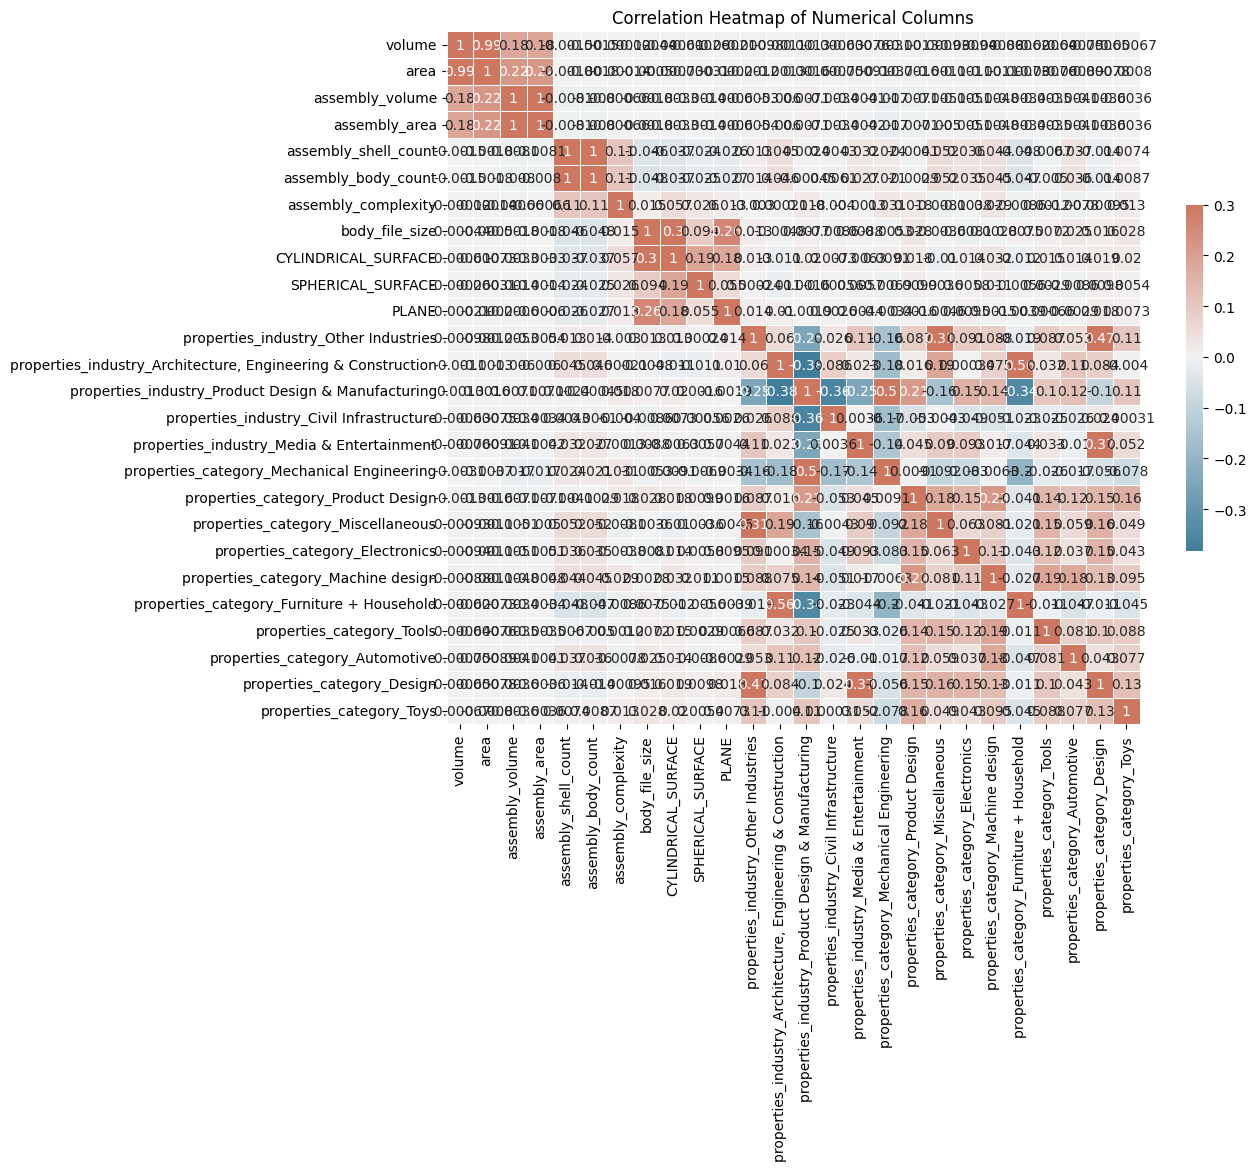

In [34]:
# Filter df_main_fe to only include numerical columns
numerical_columns = df_main_fe.select_dtypes(include=['float64', 'int64']).columns
df_numerical = df_main_fe[numerical_columns]

# Compute the correlation matrix
corr = df_numerical.corr()

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, cmap=cmap, vmax=.3, center=0, annot=True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.title("Correlation Heatmap of Numerical Columns")
plt.show()

In [35]:
df_main.to_pickle('df_main_fe.pkl')

In [36]:
df_test_main.to_pickle('df_test_main_fe.pkl')

In [37]:
df_main.shape

(131248, 38)

In [38]:
df_test_main.shape

(155, 38)

In [39]:
df_test_main.tail(10)

,body_id,assembly_id,name,volume,area,material_category,properties_vertex_count,properties_edge_count,properties_face_count,properties_loop_count,...,"properties_industry_Architecture, Engineering & Construction",properties_industry_Product Design & Manufacturing,properties_industry_Civil Infrastructure,properties_industry_Media & Entertainment,components_name,body_file_size,CYLINDRICAL_SURFACE,SPHERICAL_SURFACE,PLANE,assembly_complexity
145,3b4bd5f0-05cc-11ec-a6d8-064a63348d37,74576_73ac0093,Travesaño Corto_4,1675.351488,1370.787200,None,120,184,90,90,...,0,1,0,0,Travesaños,9183,0,0,7,1987200
146,3b4bfcec-05cc-11ec-bde0-064a63348d37,74576_73ac0093,Travesaño Largo _ 1,2449.543488,1980.387200,None,120,184,90,90,...,0,1,0,0,Travesaños,9160,0,0,7,1987200
147,3b4c4b1e-05cc-11ec-93f3-064a63348d37,74576_73ac0093,Travesaño Largo _ 2,2449.543488,1980.387200,None,120,184,90,90,...,0,1,0,0,Travesaños,9158,0,0,7,1987200
148,3b4c721a-05cc-11ec-a691-064a63348d37,74576_73ac0093,Travesaño Largo _ 3,2449.543488,1980.387200,None,120,184,90,90,...,0,1,0,0,Travesaños,9164,0,0,7,1987200
149,3b4cc050-05cc-11ec-8b73-064a63348d37,74576_73ac0093,Travesaño Largo _ 4,2449.543488,1980.387200,None,120,184,90,90,...,0,1,0,0,Travesaños,9166,0,0,7,1987200
150,3b4ce74c-05cc-11ec-a9ce-064a63348d37,74576_73ac0093,Pata_1,2064.512000,1677.212800,None,120,184,90,90,...,0,1,0,0,Patas,9071,0,0,7,1987200
151,3b4d0e4c-05cc-11ec-9c6d-064a63348d37,74576_73ac0093,Pata_4,2064.512000,1677.212800,None,120,184,90,90,...,0,1,0,0,Patas,9149,0,0,7,1987200
152,3b4d355a-05cc-11ec-9f42-064a63348d37,74576_73ac0093,Pata_3,2064.512000,1677.212800,None,120,184,90,90,...,0,1,0,0,Patas,9123,0,0,7,1987200
153,3b4d8388-05cc-11ec-acde-064a63348d37,74576_73ac0093,Pata_2,2064.512000,1677.212800,None,120,184,90,90,...,0,1,0,0,Patas,9097,0,0,7,1987200
154,3b4daaa2-05cc-11ec-bc9f-064a63348d37,74576_73ac0093,Body1,33436.374783,27786.304206,None,120,184,90,90,...,0,1,0,0,Tabla,23759,8,0,7,1987200


In [40]:
df_main.tail(10)

,body_id,assembly_id,name,volume,area,material_category,properties_vertex_count,properties_edge_count,properties_face_count,properties_loop_count,...,"properties_industry_Architecture, Engineering & Construction",properties_industry_Product Design & Manufacturing,properties_industry_Civil Infrastructure,properties_industry_Media & Entertainment,components_name,body_file_size,CYLINDRICAL_SURFACE,SPHERICAL_SURFACE,PLANE,assembly_complexity
131238,f9532c12-0613-11ec-84f4-0226f5980261,99852_1dadcef4,NaN,24.540831,187.260416,Metal_Non-Ferrous,3511,5189,1902,2420,...,0,1,0,0,Rin 2,818798,205,0,87,34651737258
131239,f958831a-0613-11ec-83a4-0226f5980261,99852_1dadcef4,NaN,0.396745,27.441561,Metal_Ferrous_Steel,3511,5189,1902,2420,...,0,1,0,0,Rin 2,7207,2,0,3,34651737258
131240,f958aa6e-0613-11ec-9298-0226f5980261,99852_1dadcef4,NaN,0.396745,27.441561,Metal_Ferrous_Steel,3511,5189,1902,2420,...,0,1,0,0,Rin 2,7215,2,0,3,34651737258
131241,f958f85a-0613-11ec-8c8a-0226f5980261,99852_1dadcef4,NaN,0.267443,5.030252,Metal_Ferrous_Steel,3511,5189,1902,2420,...,0,1,0,0,pedal,57984,12,0,31,34651737258
131242,f95946b4-0613-11ec-9603-0226f5980261,99852_1dadcef4,NaN,0.624111,5.904921,Metal_Ferrous_Steel,3511,5189,1902,2420,...,0,1,0,0,sujetador,53709,15,0,14,34651737258
131243,f95a09b6-0613-11ec-b131-0226f5980261,99852_1dadcef4,NaN,0.116680,1.729151,Metal_Ferrous_Steel,3511,5189,1902,2420,...,0,1,0,0,manubrio,17938,4,0,6,34651737258
131244,f95a5828-0613-11ec-ab9b-0226f5980261,99852_1dadcef4,NaN,0.002853,0.129364,Metal_Ferrous_Steel,3511,5189,1902,2420,...,0,1,0,0,tornillo doble,6562,1,1,3,34651737258
131245,f95a7efe-0613-11ec-bc18-0226f5980261,99852_1dadcef4,NaN,0.000024,0.016467,Metal_Ferrous_Steel,3511,5189,1902,2420,...,0,1,0,0,tornillo doble,7424,2,0,3,34651737258
131246,f95acd26-0613-11ec-a896-0226f5980261,99852_1dadcef4,NaN,0.002356,0.109956,Metal_Ferrous_Steel,3511,5189,1902,2420,...,0,1,0,0,tornillo sencillo,5677,1,0,3,34651737258
131247,f95af41c-0613-11ec-8208-0226f5980261,99852_1dadcef4,NaN,0.001571,0.094248,Metal_Ferrous_Steel,3511,5189,1902,2420,...,0,1,0,0,tornillo sencillo,5678,1,0,3,34651737258
